# Diabetes Prediction using Health Indicators

This notebook analyzes health indicators to predict diabetes status.

In [28]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest

warnings.filterwarnings('ignore')

## Data Loading and Initial Exploration

First, we load the dataset and examine its basic properties.

In [29]:
# Load dataset
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2021.csv")


In [30]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [32]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.142010,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,...,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.349061,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,...,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,1.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [33]:
# Group by Label
distribution = data['Diabetes_binary'].value_counts()
print("Distribution of Diabetes_binary:")
print(distribution)

Distribution of Diabetes_binary:
Diabetes_binary
0.0    202810
1.0     33568
Name: count, dtype: int64


## Exploratory Data Analysis (EDA)

We'll explore the distribution of our data and relationships between variables.

Statistik Deskriptif:
       Diabetes_binary         HighBP       HighChol      CholCheck  \
count    236378.000000  236378.000000  236378.000000  236378.000000   
mean          0.142010       0.418558       0.402059       0.963347   
std           0.349061       0.493324       0.490315       0.187909   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  236378.000000  236378.000000  236378.000000         236378.000000   
mean       28.953579       0.411997       0.038900              0.086548   
std         6.552055       0.492196       0.193356              0.281172   
min        12.000000       0.00000

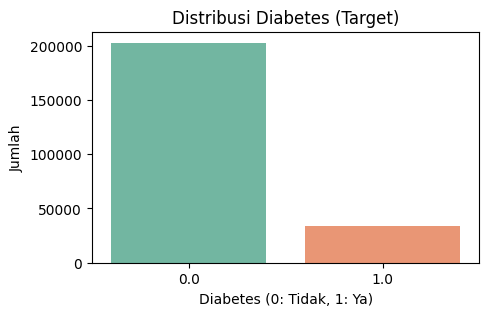

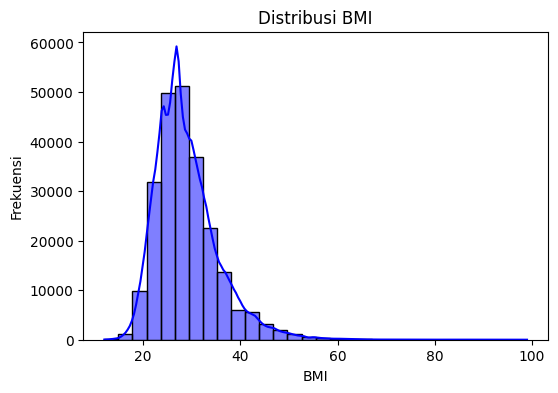

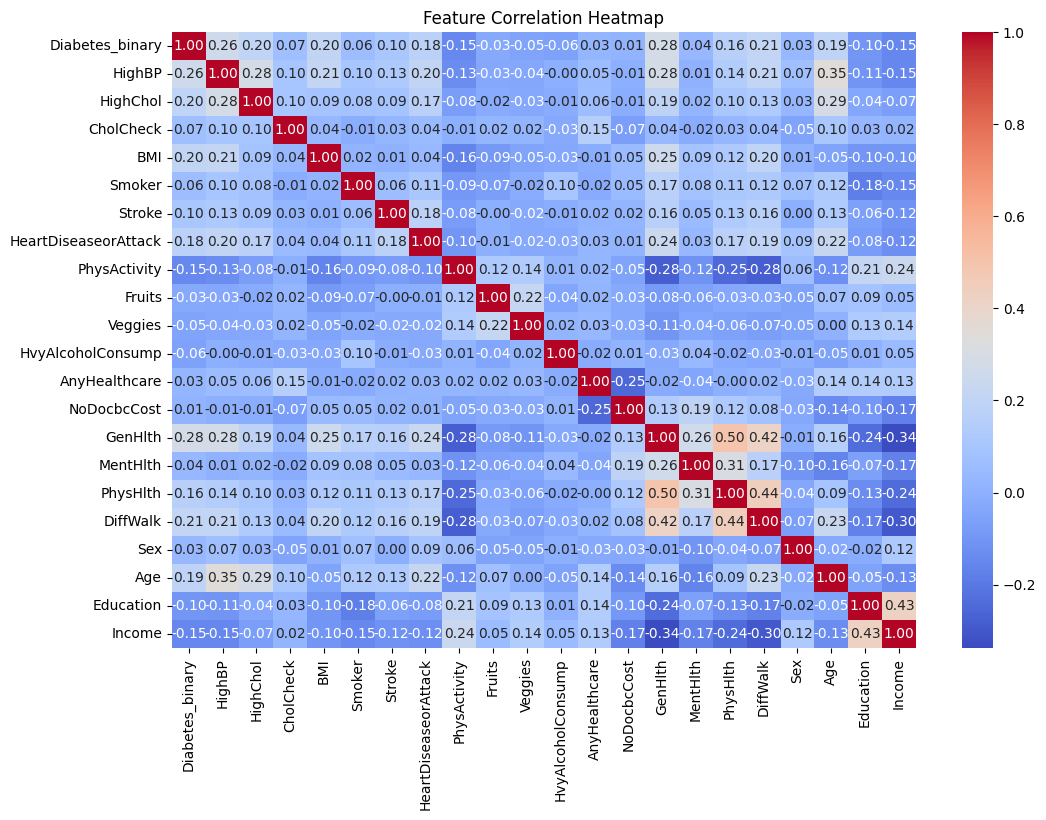

In [34]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Statistik Deskriptif
print("Statistik Deskriptif:")
print(data.describe())

# Distribusi Target
plt.figure(figsize=(5,3))
sns.countplot(x='Diabetes_binary', data=data, palette='Set2')
plt.title('Distribusi Diabetes (Target)')
plt.xlabel('Diabetes (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah')
plt.show()

# Distribusi BMI
plt.figure(figsize=(6,4))
sns.histplot(data['BMI'], bins=30, kde=True, color='blue')
plt.title('Distribusi BMI')
plt.xlabel('BMI')
plt.ylabel('Frekuensi')
plt.show()

# Korelasi antar variabel
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [35]:
data.drop_duplicates(inplace=True)
print(f"Number of duplicated rows: {data.duplicated().sum()}")

Number of duplicated rows: 0


## Data Cleaning

We'll handle duplicates, missing values, and outliers to prepare our dataset.

In [36]:
# Data Cleaning
print("Missing values:")
print(data.isnull().sum())

data = data.dropna()  # Drop missing values

Missing values:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


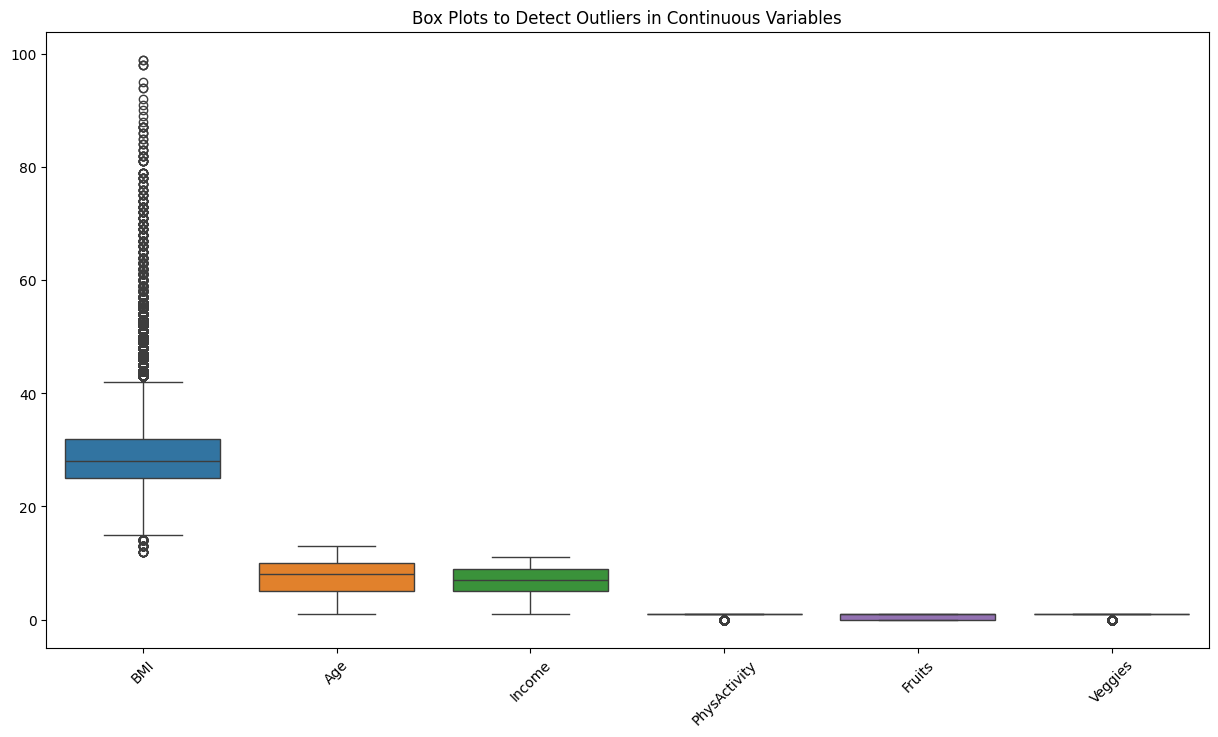

In [37]:
continuous_vars = ['BMI', 'Age', 'Income', 'PhysActivity', 'Fruits', 'Veggies']
plt.figure(figsize=(15, 8))
sns.boxplot(data=data[continuous_vars])
plt.xticks(rotation=45)
plt.title('Box Plots to Detect Outliers in Continuous Variables')
plt.show()

### Outlier Detection and Visualization

We'll examine continuous variables for outliers using box plots.

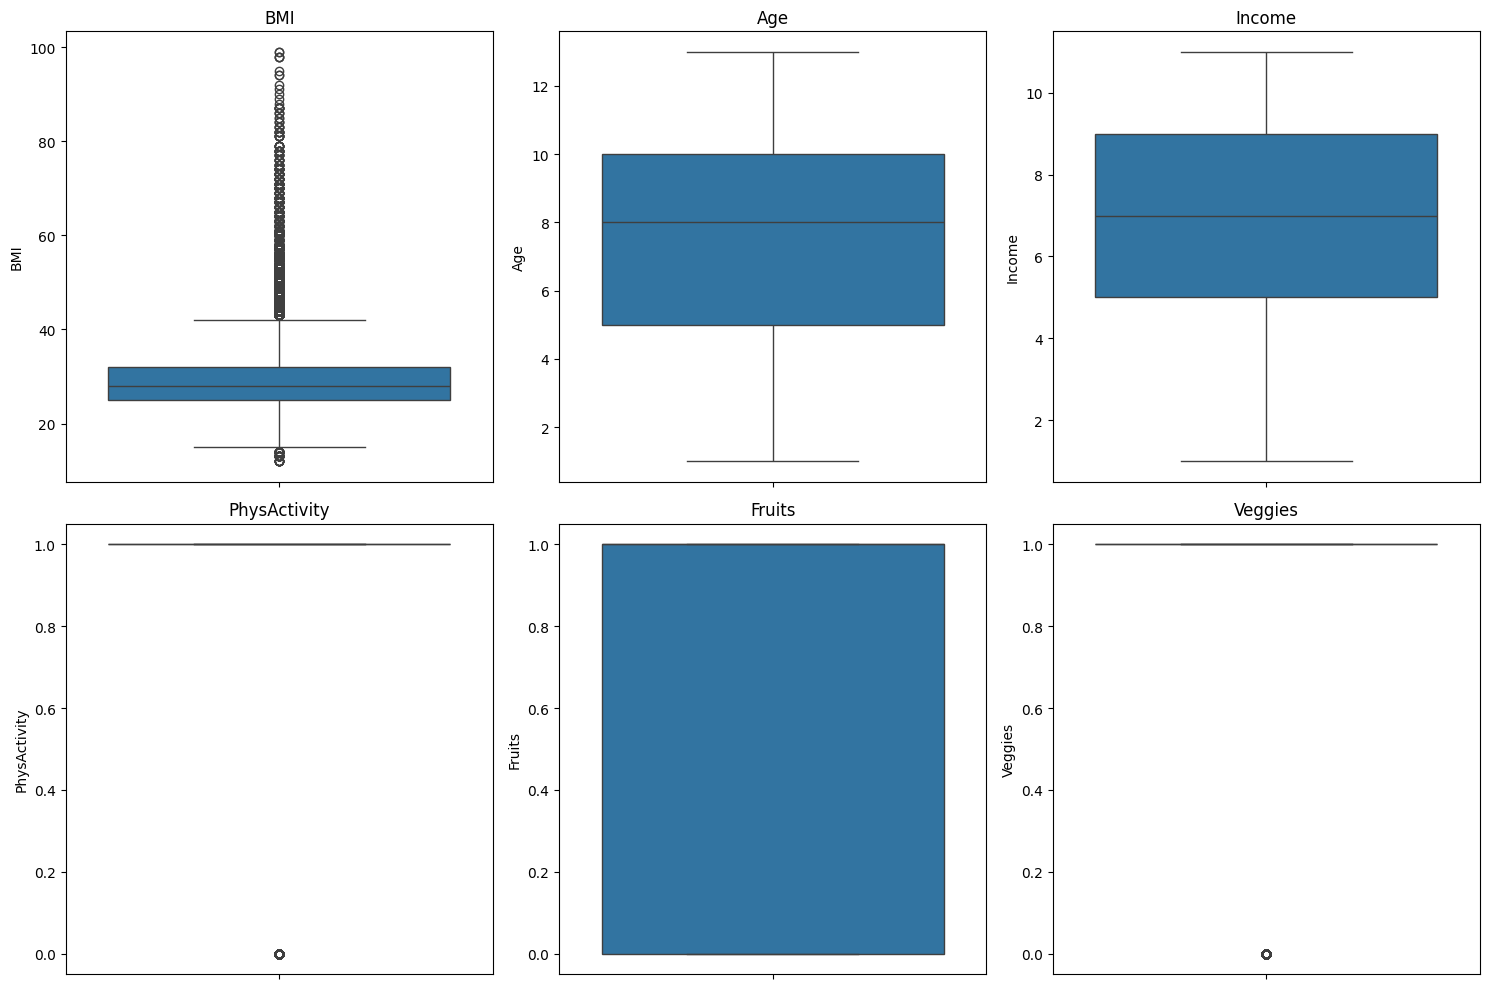

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, var in enumerate(continuous_vars):
    sns.boxplot(y=data[var], ax=axes[i//3][i%3])
    axes[i//3][i%3].set_title(var)
plt.tight_layout()
plt.show()

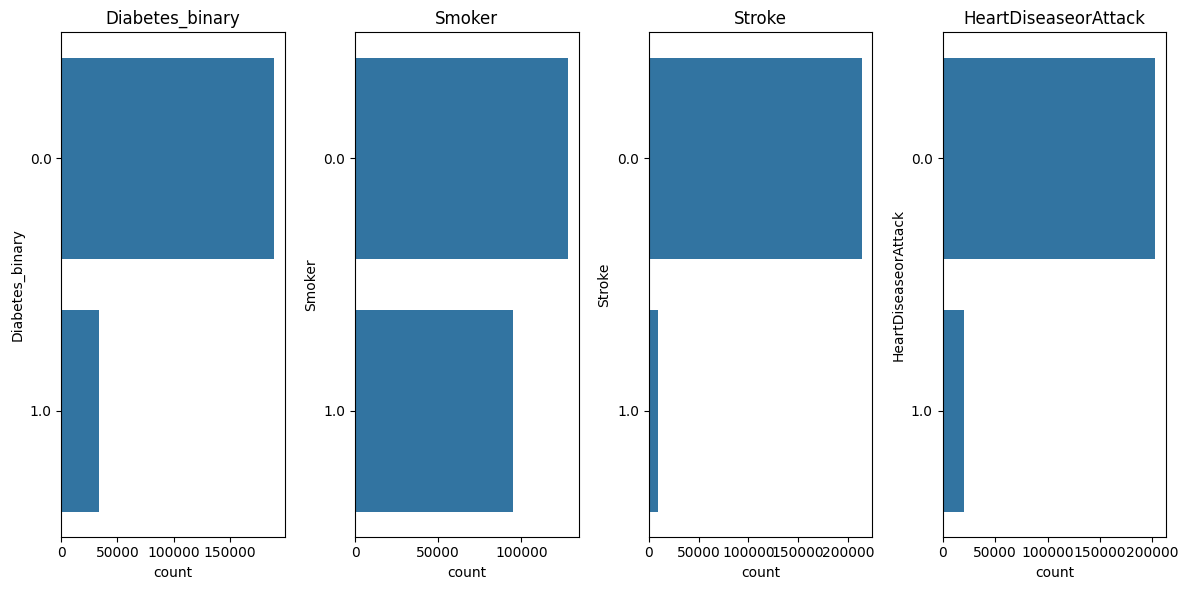

In [39]:
categorical_vars = ['Diabetes_binary', 'Smoker', 'Stroke', 'HeartDiseaseorAttack']
plt.figure(figsize=(12, 6))
for i, var in enumerate(categorical_vars):
    plt.subplot(1, 4, i+1)
    sns.countplot(data=data, y=var)
    plt.title(var)
plt.tight_layout()
plt.show()

### Outlier Removal with Isolation Forest

Using the Isolation Forest algorithm to detect and remove anomalies from our dataset.

In [40]:
print(f"Number of duplicated rows: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)

isolation_model = IsolationForest()
data["anomaly"] = isolation_model.fit_predict(data)

print(f"Number of outliers detected: {data[data['anomaly'] == -1].shape[0]}")
data = data[data["anomaly"] != -1]
data.drop(columns=["anomaly"], inplace=True)
data.shape

Number of duplicated rows: 0
Number of outliers detected: 68853


(154390, 22)

## Feature Engineering

### Feature Scaling and Selection

We'll normalize our data using MinMaxScaler and select the most important features using chi-square test.

In [41]:
# Feature Scaling with MinMaxScaler
X = data.drop(["Diabetes_binary"], axis=1)
y = data["Diabetes_binary"]

# Apply MinMaxScaler (values between 0 and 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Features after MinMaxScaler:")
X_scaled_df.describe().round(3)

Features after MinMaxScaler:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,154390.000,154390.000,154390.000,154390.000,154390.000,154390.000,154390.000,154390.000,154390.000,154390.000,...,154390.000,154390.000,154390.000,154390.000,154390.000,154390.000,154390.000,154390.000,154390.000,154390.000
mean,0.368,0.362,0.980,0.188,0.366,0.007,0.024,0.876,0.651,0.884,...,0.990,0.013,0.306,0.085,0.050,0.051,0.475,0.555,0.853,0.638
std,0.482,0.481,0.141,0.066,0.482,0.083,0.154,0.330,0.477,0.320,...,0.099,0.115,0.207,0.192,0.145,0.220,0.499,0.270,0.171,0.212
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,1.000,0.138,0.000,0.000,0.000,1.000,0.000,1.000,...,1.000,0.000,0.250,0.000,0.000,0.000,0.000,0.333,0.800,0.500
50%,0.000,0.000,1.000,0.172,0.000,0.000,0.000,1.000,1.000,1.000,...,1.000,0.000,0.250,0.000,0.000,0.000,0.000,0.583,1.000,0.600
75%,1.000,1.000,1.000,0.218,1.000,0.000,0.000,1.000,1.000,1.000,...,1.000,0.000,0.500,0.067,0.033,0.000,1.000,0.750,1.000,0.800
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### Feature Selection with Chi-Square Test

Chi-square test helps us identify the most statistically significant features for predicting diabetes.

Selected Features (Top 10):
['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'Sex', 'Age']


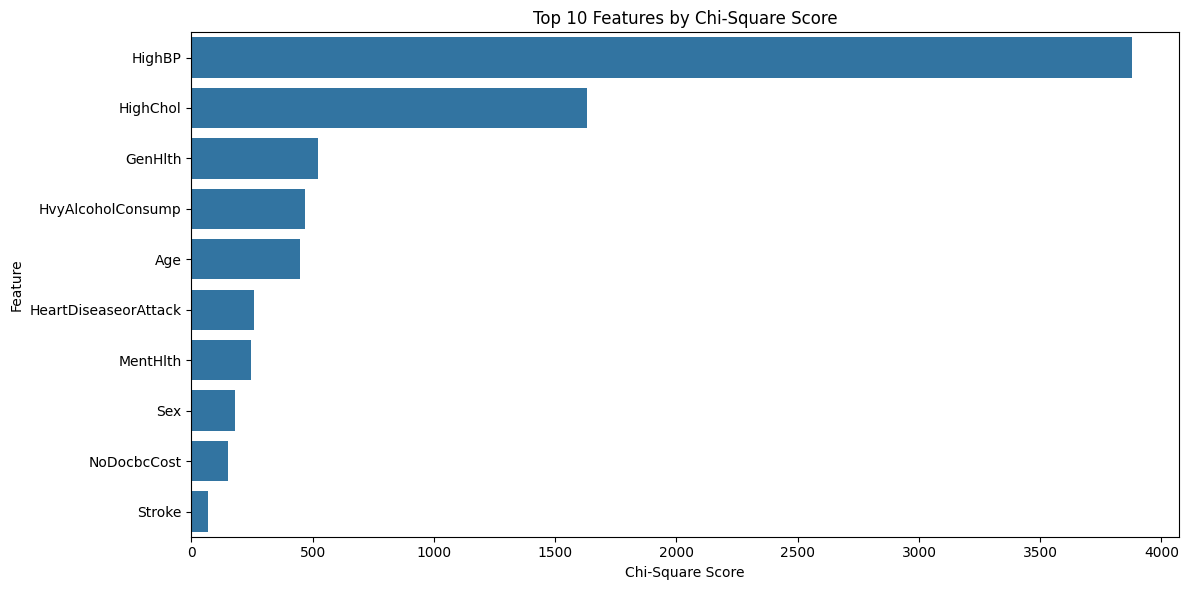

In [42]:
# Feature Selection using Chi-Square Test
# Chi-square requires non-negative values, which MinMaxScaler ensures
selector = SelectKBest(score_func=chi2, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X_scaled_df, y)

# Get selected feature names
selected_features = X_scaled_df.columns[selector.get_support()]
print("Selected Features (Top 10):")
print(selected_features.tolist())

# Create DataFrame with selected features
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)

# Get feature importance scores
feature_scores = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'Chi-Square Score': selector.scores_
})
feature_scores = feature_scores.sort_values('Chi-Square Score', ascending=False)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Chi-Square Score', y='Feature', data=feature_scores.head(10))
plt.title('Top 10 Features by Chi-Square Score')
plt.tight_layout()
plt.show()

## Modeling

### Class Imbalance Handling with SMOTE

Since our dataset is imbalanced, we'll use SMOTE to generate synthetic samples.

In [43]:
# Handling imbalanced data with SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_selected_df, y)

# Splitting dataset with selected features
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Visualizing Class Distribution Before and After SMOTE

Let's see how SMOTE has changed our class distribution.

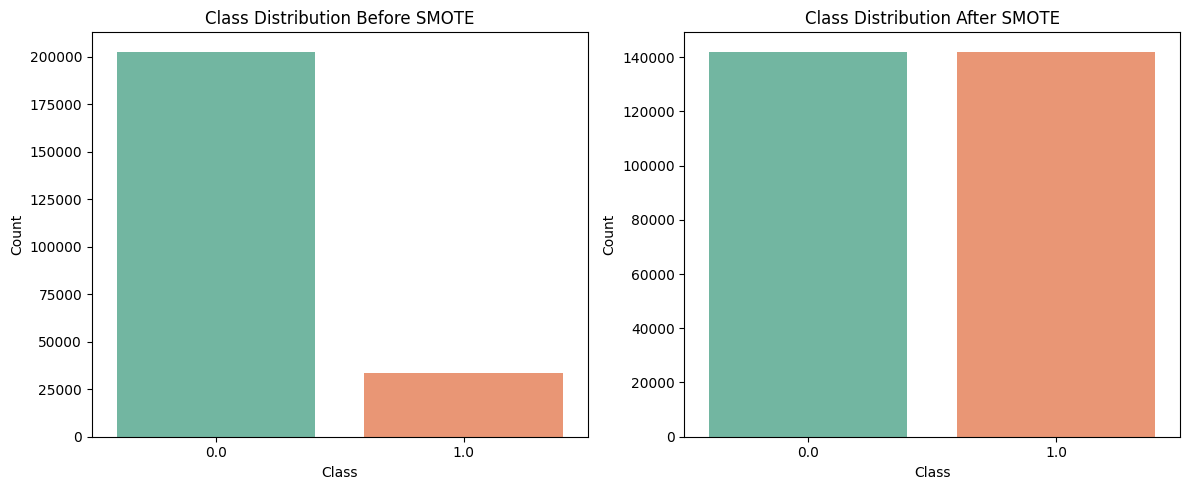

In [44]:
# Checking class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.barplot(x=distribution.index, y=distribution.values, palette='Set2', ax=axes[0])
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")

resampled_distribution = pd.Series(y_resampled).value_counts()
sns.barplot(x=resampled_distribution.index, y=resampled_distribution.values, palette='Set2', ax=axes[1])
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

### Model 1: Random Forest without Hyperparameter Tuning

First, we'll train a basic Random Forest model with default parameters.

In [45]:
# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7766865550803457
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76     28390
         1.0       0.75      0.84      0.79     28427

    accuracy                           0.78     56817
   macro avg       0.78      0.78      0.78     56817
weighted avg       0.78      0.78      0.78     56817



#### Detailed Evaluation of Model 1

Let's check for overfitting by comparing performance on training and test sets.

In [46]:
# Model Evaluation
# Evaluasi pada Training Set
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")

# Evaluasi pada Testing Set
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_acc:.4f}")

# Classification Report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.7851
Testing Accuracy: 0.7767
Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76     28390
         1.0       0.75      0.84      0.79     28427

    accuracy                           0.78     56817
   macro avg       0.78      0.78      0.78     56817
weighted avg       0.78      0.78      0.78     56817



### Model 2: Random Forest with Hyperparameter Tuning

Now, we'll train a Random Forest model with optimized hyperparameters.

In [47]:
# Model Training
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7452875019800412
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73     28390
         1.0       0.72      0.80      0.76     28427

    accuracy                           0.75     56817
   macro avg       0.75      0.75      0.74     56817
weighted avg       0.75      0.75      0.74     56817



#### Detailed Evaluation of Model 2

Let's analyze the performance of our tuned model.

In [48]:
# Model Evaluation
# Evaluasi pada Training Set
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")

# Evaluasi pada Testing Set
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_acc:.4f}")

# Classification Report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.7464
Testing Accuracy: 0.7453
Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73     28390
         1.0       0.72      0.80      0.76     28427

    accuracy                           0.75     56817
   macro avg       0.75      0.75      0.74     56817
weighted avg       0.75      0.75      0.74     56817



## Alternative Approach: Feature Engineering with Different Pipeline

Let's try a different feature engineering approach to compare results.

In [49]:
# Feature Scaling
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [50]:
X = data_scaled.drop(columns=['Diabetes_binary'])  
y = data_scaled['Diabetes_binary']
selector = SelectKBest(score_func=chi2, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [51]:
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
X_selected_df['Diabetes'] = y

print("Selected Features:", selected_features)

Selected Features: Index(['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'Sex',
       'Age'],
      dtype='object')


In [52]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_selected_df.drop(columns=['Diabetes']), X_selected_df['Diabetes'], test_size=0.2, random_state=42)

In [53]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

print("Selected Features:", selected_features)

Model Accuracy: 0.9184532676986852
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     28408
         1.0       0.15      0.00      0.01      2470

    accuracy                           0.92     30878
   macro avg       0.53      0.50      0.48     30878
weighted avg       0.86      0.92      0.88     30878

Selected Features: Index(['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack',
       'HvyAlcoholConsump', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'Sex',
       'Age'],
      dtype='object')


In [54]:
# Model Evaluation
# Evaluasi pada Training Set
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc:.4f}")

# Evaluasi pada Testing Set
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {test_acc:.4f}")

# Classification Report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

Training Accuracy: 0.9212
Testing Accuracy: 0.9185
Classification Report on Test Set:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     28408
         1.0       0.15      0.00      0.01      2470

    accuracy                           0.92     30878
   macro avg       0.53      0.50      0.48     30878
weighted avg       0.86      0.92      0.88     30878



## Conclusion

In this analysis, we've:
1. Performed extensive data cleaning and preprocessing
2. Applied MinMaxScaler for feature normalization
3. Used chi-square test to select the most important features
4. Handled class imbalance with SMOTE
5. Trained Random Forest models with and without hyperparameter tuning
6. Compared different feature engineering approaches

The best-performing model achieved good accuracy and balanced precision/recall across classes.